# <font color=blue> Automobile Company Case Study </font>

**<font color=green>Problem Statement:</font>** A Chinese automobile company **Geely Auto** aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car
 
**<font color=green>Business Goal:</font>**
We are required to model the **price of cars** with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder #to encode categorical values
from sklearn.preprocessing import MinMaxScaler # to scale the data
from sklearn.model_selection import train_test_split # To create train test split
from sklearn.feature_selection import RFE # to calculate RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor # To calculate VIF
import statsmodels.api as sm  
import warnings

In [2]:
###supress warnings
warnings.filterwarnings('ignore')

# Step 1: Reading and Understanding the Data
    -Let's understand all the columns including categorical values
    -Also do some data clean  

In [3]:
#Importing dataset
carprice = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
#Let's explore the top 5 rows
carprice.head(5)
carprice.shape ## (205,26)
carprice.info()
carprice.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
##Understand values in different categorical columns
print(carprice.symboling.value_counts()) 
print("\n")
print(carprice.fueltype.value_counts())
print("\n")
print(carprice.aspiration.value_counts())
print("\n")
print(carprice.doornumber.value_counts())
print("\n")
print(carprice.carbody.value_counts())
print("\n")
print(carprice.drivewheel.value_counts())
print("\n")
print(carprice.enginelocation.value_counts())
print("\n")
print(carprice.enginetype.value_counts())
print("\n")
print(carprice.cylindernumber.value_counts())
print("\n")
print(carprice.fuelsystem.value_counts())

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


gas       185
diesel     20
Name: fueltype, dtype: int64


std      168
turbo     37
Name: aspiration, dtype: int64


four    115
two      90
Name: doornumber, dtype: int64


sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


front    202
rear       3
Name: enginelocation, dtype: int64


ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64


mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64


In [6]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Cleanup

### There are few columns which require cleanup:
    1. Drop Car_ID column as it is just a unique id for observation and doesn't contribute to car price
    2. Split CarName column by CarCompany Name and Car model name keeping only CarCompany Name as it has been asked to consider as independent variable.
    3. There are multiple Car Company Names which are incorrect or spelled differently so replacing with correct name

In [7]:
carprice.drop('car_ID',axis=1,inplace=True)

In [8]:
carprice['CarName'] = carprice['CarName'].str.split(' ',n=1,expand=True)[0]
carprice.rename(columns ={'CarName':'carcompany'},inplace=True)

In [9]:
carprice.isnull().sum()
##No null values in dataset

symboling           0
carcompany          0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
carprice.carcompany.value_counts().sort_index()

Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: carcompany, dtype: int64

In [11]:
carprice['carcompany'].replace({"maxda": "mazda", "porcshce": "porsche","toyouta": "toyota","vokswagen":"volkswagen",
                            "vw":"volkswagen","Nissan":"nissan"}, inplace=True)

# Step 2: Visualising the Data
    - To check if there is some obvious multicollinearity going on. 
    - We'll try to identify if some predictors directly have a strong association with the outcome (price) variable
    - We'll visualise our data using matplotlib and seaborn.

### 2.1 Visualising Numeric Variables

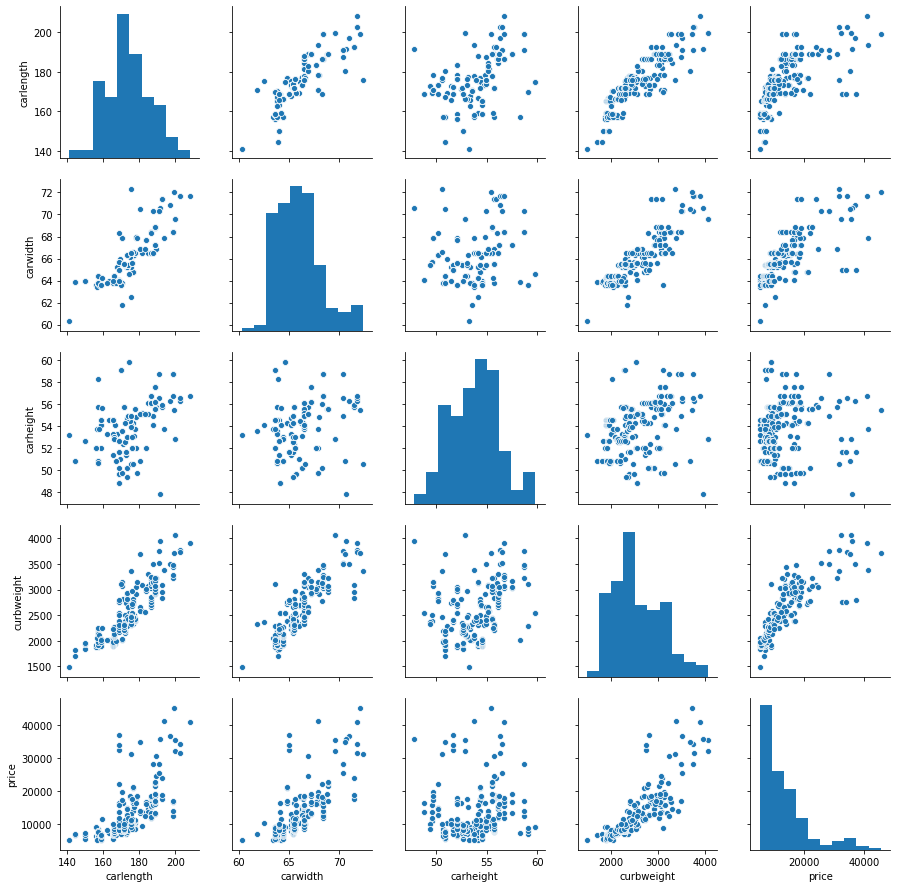

In [12]:
carprice_1 = carprice[['carlength','carwidth', 'carheight', 'curbweight','price']]
sns.pairplot(carprice_1)
plt.show()

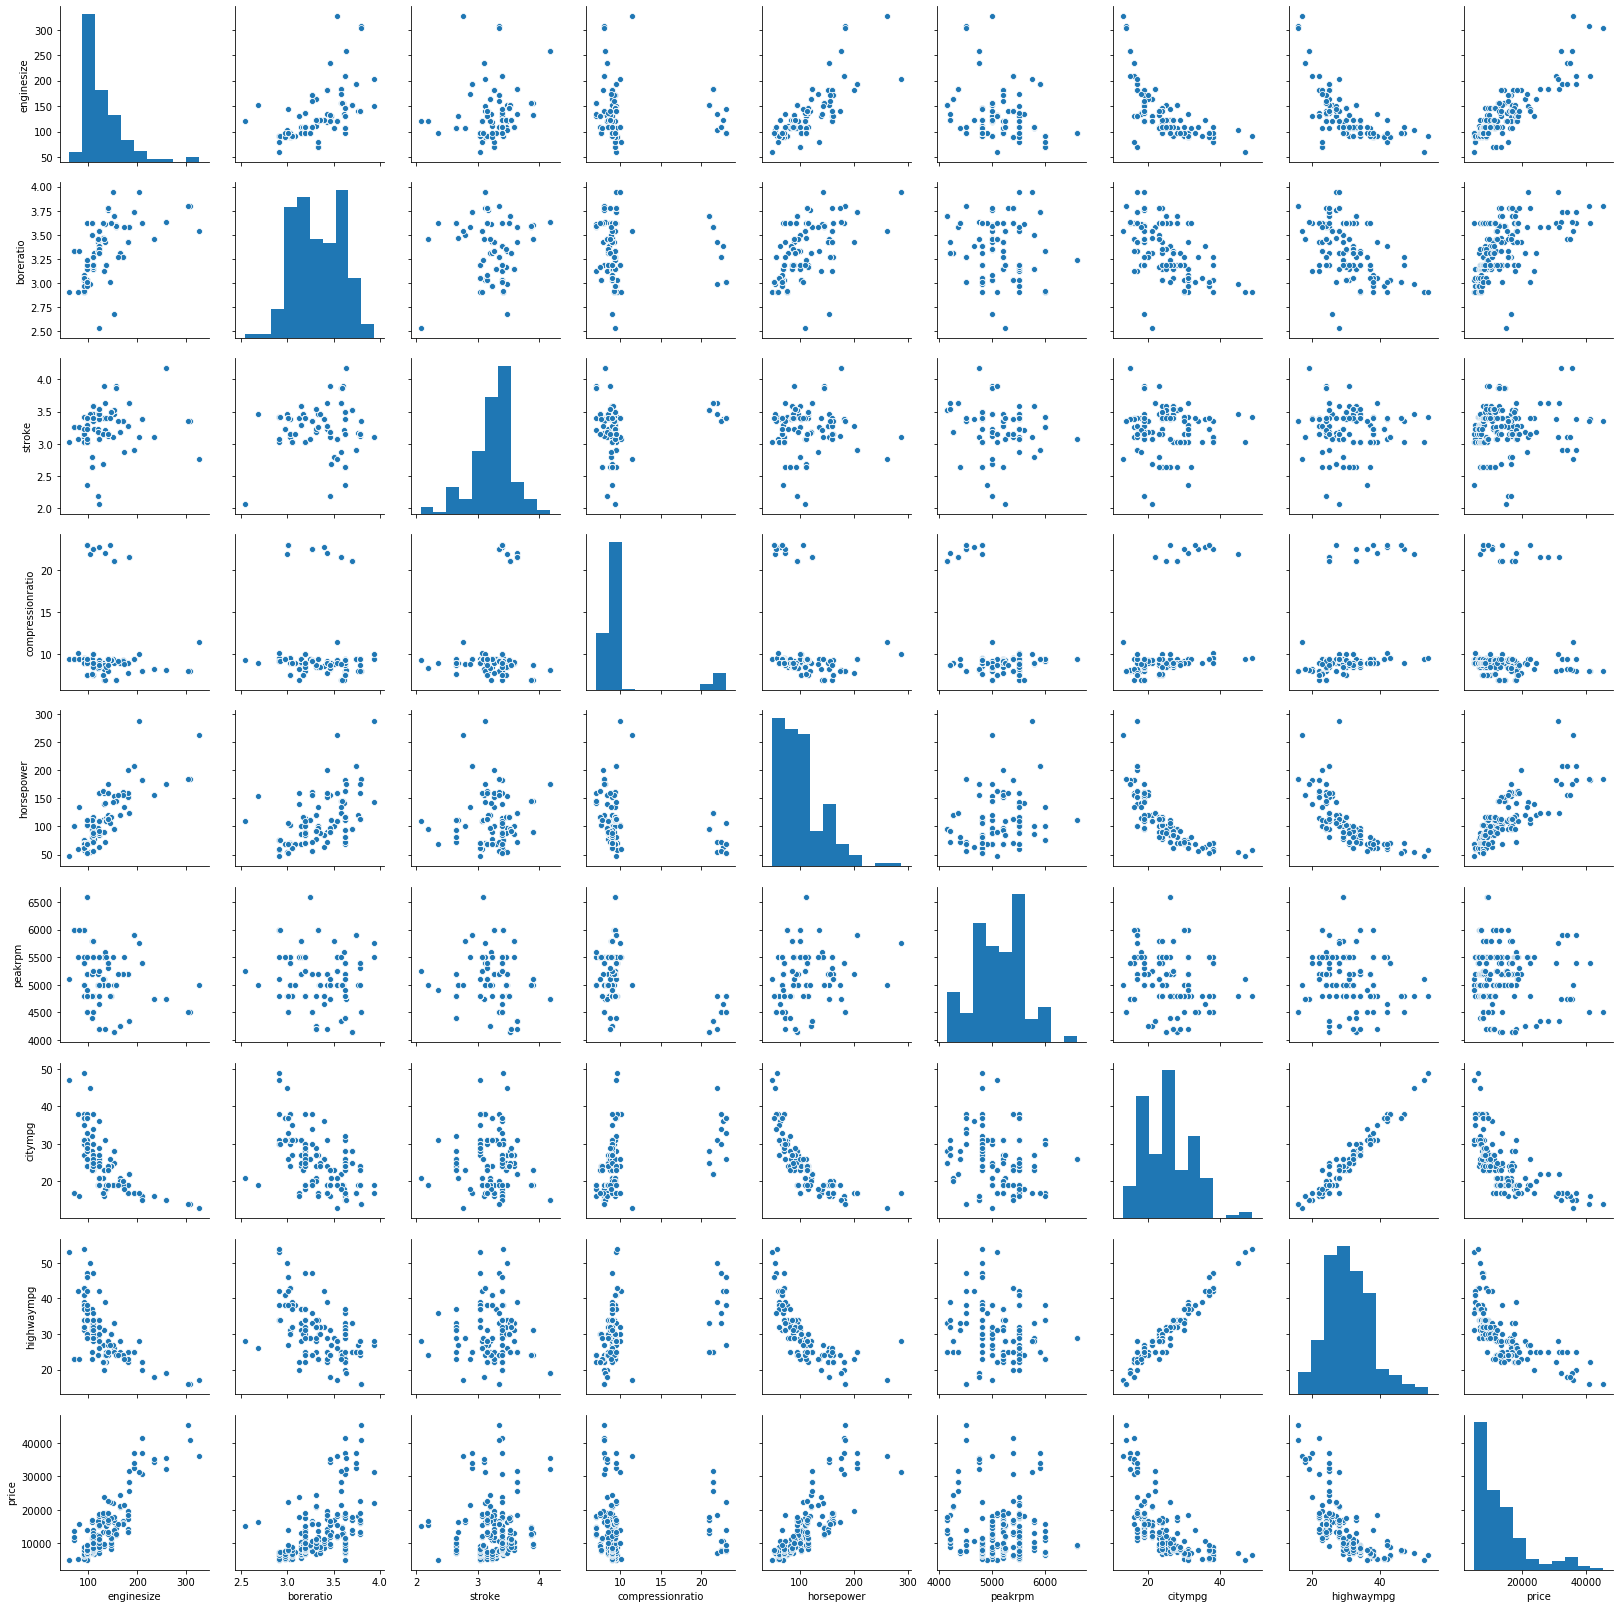

In [13]:
carprice_2 = carprice[['enginesize','boreratio', 'stroke', 'compressionratio',
                       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
sns.pairplot(carprice_2)
plt.show()

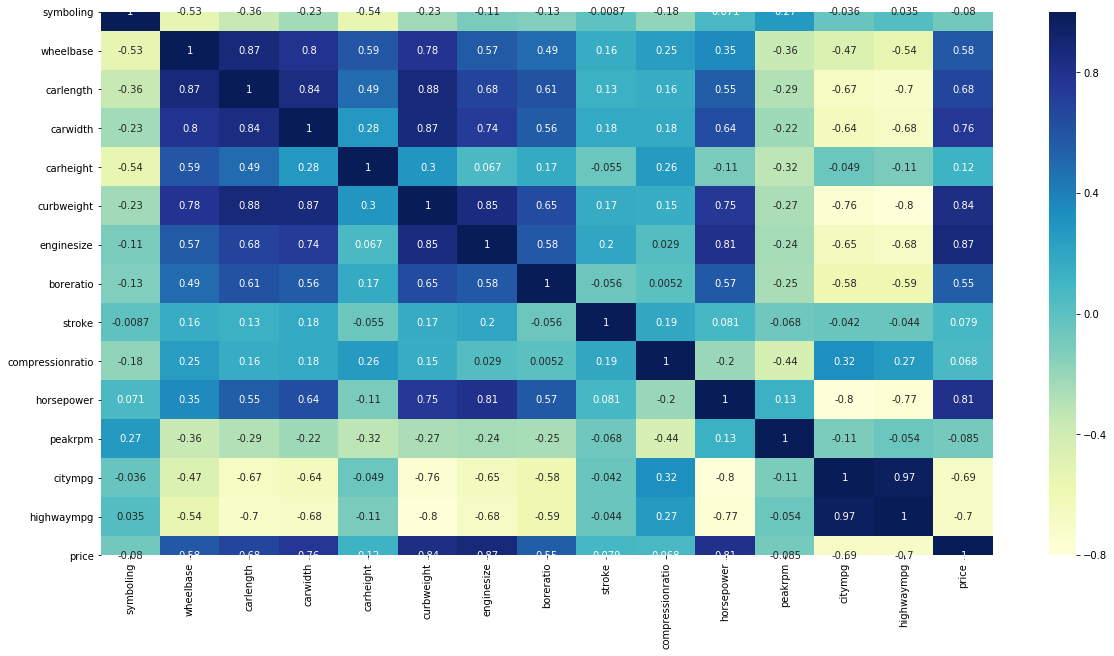

In [14]:
plt.figure(figsize = (20,10))  
sns.heatmap(carprice.corr(),annot = True,cmap="YlGnBu")

## High correlation
#### <font color='green'>`wheelbase`,`carlength`,`carwidth`, `curbweight` seem to have high correlation</font> 
#### <font color='green'> `citympg` and `highwaympg` seem to have high correlation 0.97 so we can one of them</font>


## Correlation with price
#### <font color='green'> `price` seems to have `+ve` linear correlation with `horsepower`, `enginesize`,`wheelbase`,`carlenght`,`carwidth`, `curbweight`</font>
#### <font color='green'> `price` seems to have `-ve` linear correlation with `highwaympg` and `citympg`</font>


#### 2.2 Visualising Categorical Variables
    -Using box plot to visualize the categorical variables to understand median, 25th & 75th percentile and outliers
    -As dataset is very small and outliers are required to model correctly so not removing any of outliers.

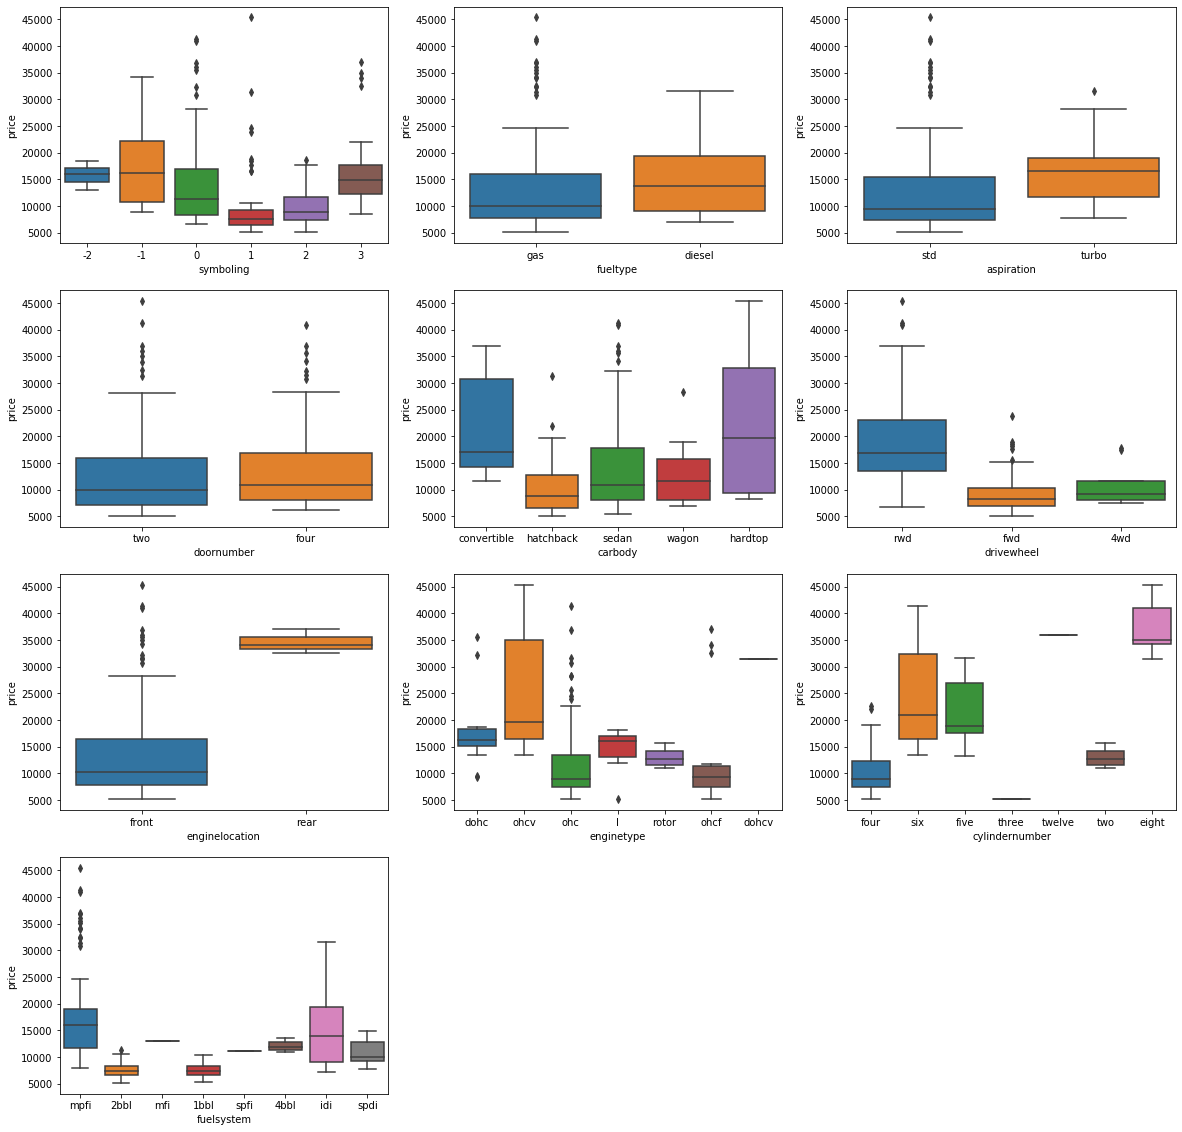

In [15]:
plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = carprice)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.show()

#### <font color='green'>1. `symboling` - lower the risk rating, higher the price median except highest risk rating of 3. Price of risk rating 3 must be driven by some other parameters </font>
#### <font color='green'>2. `fueltype` - diesel based cars have higher price median</font>
#### <font color='green'>3. `aspiration` - Cars with turbo have higher price median</font>
#### <font color='green'>3. `carbody` - Cars with convertible and hardtop body have higher price median</font>
#### <font color='green'>4. `drivewheel` - Cars with rdw (rear drive wheel) have higher price median</font>
#### <font color='green'>5. `enginelocation` - Cars with rear engine location have higher price median</font>
#### <font color='green'>6. `enginetype` - Cars with ohcv & dohcv engine type have higher price median</font>
#### <font color='green'>7. `cylindernumber` - Cars with higher cylinders have higher price median</font>
#### <font color='green'>8. `carcompany` - Few companies cars are having higher price median like Jaguar, buick, porsche</font>

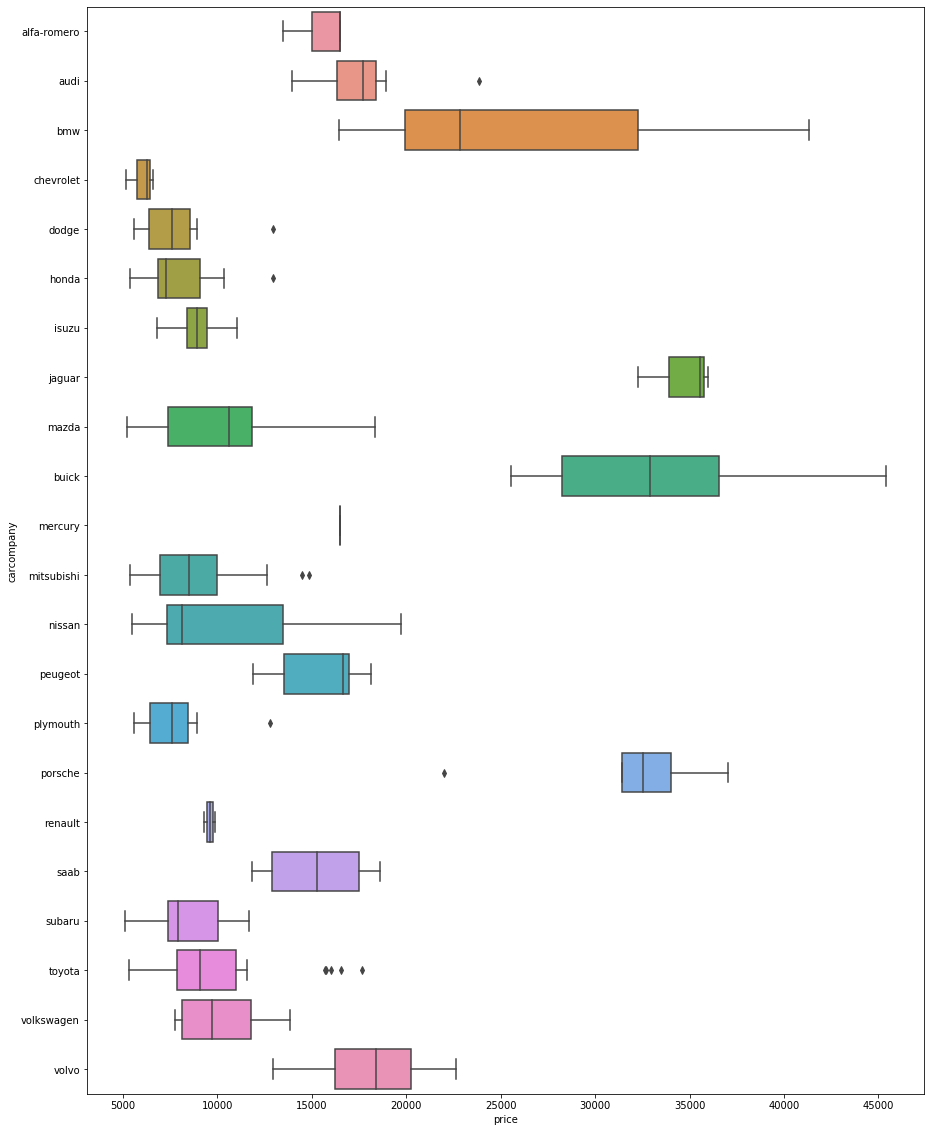

In [16]:
plt.figure(figsize=(15, 20))
sns.boxplot(x = 'price', y = 'carcompany', data = carprice,orient="h")

### <font color=green> `BMW` and `Buick` car company has wider spread on car price as compared to other companies so they can be important variables for `price` </font>

# Step 3: Data Preparation:

    - There are many columns with values with categorical data but in order to fit a regression line, we would need numerical  values and not string. Hence, we need to convert them to numeric.
    
    - Below variables have only two values so we can convert them to 1 or 0 using LabelEncoder():
    a) fueltype: diesel=0 | gas=1 
    b) aspiration: std=0 | turbo=1
    c) doornumber: four=0 | two=1
    d) enginelocation: front=0 | rear=1

In [17]:
le = LabelEncoder()
carprice['fueltype'] = le.fit(carprice['fueltype']).transform(carprice['fueltype'])
carprice['aspiration'] = le.fit(carprice['aspiration']).transform(carprice['aspiration'])
carprice['doornumber'] = le.fit(carprice['doornumber']).transform(carprice['doornumber'])
carprice['enginelocation'] = le.fit(carprice['enginelocation']).transform(carprice['enginelocation'])

### Create dummies
    -Create dummies for below variables
    a) carbody
    b) drivewheel
    c) enginetype
    d) fuelsystem

In [18]:
def create_dummies(df,col):
    '''This function is to create dummy variables for given dataframe and columns
        **Parameter Details:**
        df- dataframe name 
        col- Column name for which dummy variables need to be created
    '''
    dummy_df = pd.get_dummies(df[[col]], drop_first = True)
    # Concat original dataframe and dummy_df
    df = pd.concat([df,dummy_df],axis=1)
    # Drop column as we have created the dummies for it
    df.drop([col], axis = 1, inplace = True)
    return df

In [19]:
carprice = create_dummies(carprice,'carbody')
carprice = create_dummies(carprice,'drivewheel')
carprice = create_dummies(carprice,'enginetype')
carprice = create_dummies(carprice,'fuelsystem')
carprice = create_dummies(carprice,'carcompany')

##Verify increase in number of columns
carprice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


### Since `cylindernumber` has numbers mentioned as string, converting them into digits

In [20]:
carprice['cylindernumber'] = carprice['cylindernumber'].map({'two':2, 'three': 3,'four': 4, 
                                                             'five': 5,'six': 6,'eight': 8,'twelve':12})

### convert `symboling` column into categorical column and then create dummy columns from it
   **Steps:**
   1. Create category as `symboling` form 0 to -3 is `safe` and 1 to 3 is `risky`
   2. Create dummy variable for it as risky = 0 and safe =1   

In [21]:
carprice['symboling'] = carprice['symboling'].map({ -2 : 'safe', -1: 'safe',0: 'safe', 
                                                    1: 'risky',2: 'risky',3:'risky'})
carprice = create_dummies(carprice,'symboling')

# Step 4: Splitting the Data into Training and Testing Sets

In [22]:
df_train,df_test = train_test_split(carprice,train_size=0.7,test_size=0.3,random_state=100)

In [23]:
print(df_train.shape)
print(df_test.shape)

(143, 60)
(62, 60)


### Rescaling the Features
Here we can see that all the columns have very different integer value range so it is extremely important to rescale the  variables so that they have a comparable scale.

If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be  very large or very small as compared to the other coefficients. This will become very annoying at the time of model evaluation.

We will use MinMax scaling.

In [24]:
#num_vars= ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','cylindernumber',
#            'compressionratio','horsepower','peakrpm','highwaympg','citympg','price']
num_vars= ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','cylindernumber',
           'compressionratio','horsepower','peakrpm','highwaympg','citympg']
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [25]:
## All the above variables should have min value of 0 and max value of 1
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo,symboling_safe
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.181818,0.440559,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,...,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.454545
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,...,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.499680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [26]:
y_train = df_train.pop('price')
X_train = df_train

# Step 5: Building a linear model
    - Using RFE (recurrsive feature elimination) to select top n features. Here n=15.
    - Fit a regression line through the training data using statsmodels. 
    - We need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [27]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [28]:
#list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [29]:
## This will give us columns selected by RFE model
rfe_col = X_train.columns[rfe.support_]
print(rfe_col)

Index(['fueltype', 'enginelocation', 'carlength', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'enginetype_l', 'carcompany_bmw',
       'carcompany_peugeot', 'carcompany_porsche'],
      dtype='object')


In [30]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[rfe_col]

### Model 1: Building model using statsmodel using all the `15` columns selected by `RFE`

In [31]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
# Running the simple ordinary least square linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     125.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.29e-68
Time:                        23:22:57   Log-Likelihood:                -1286.9
No. Observations:                 143   AIC:                             2606.
Df Residuals:                     127   BIC:                             2653.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.265e+04   5982

### Checking VIF:
    - Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. 

In [32]:
# Calculate the VIFs for the new model
def VIF_calculation(X_df):
    vif = pd.DataFrame()
    X = X_df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [33]:
print(VIF_calculation(X_train_rfe))

              Features      VIF
0                const  1184.43
1             fueltype    59.33
10    compressionratio    51.66
7           enginesize    39.32
6       cylindernumber    17.99
5           curbweight    15.92
14  carcompany_peugeot    10.16
12        enginetype_l     9.23
3            carlength     8.31
8            boreratio     7.50
4             carwidth     6.84
9               stroke     3.84
15  carcompany_porsche     2.75
2       enginelocation     1.99
11             peakrpm     1.83
13      carcompany_bmw     1.18


### Model 2: `compressionratio` is insignificant (p-value >0.05) and also high correlation withother variables so can be dropped

In [34]:
X_train_2 = X_train_rfe.drop(['compressionratio'],axis=1,)
X_train_2 = sm.add_constant(X_train_2)
lm_2 = sm.OLS(y_train,X_train_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.12e-69
Time:                        23:22:57   Log-Likelihood:                -1287.0
No. Observations:                 143   AIC:                             2604.
Df Residuals:                     128   BIC:                             2648.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.023e+04   2327

In [35]:
##Checking VIF again
print(VIF_calculation(X_train_2))

              Features     VIF
0                const  180.37
7           enginesize   38.55
6       cylindernumber   17.99
5           curbweight   14.13
13  carcompany_peugeot    9.97
11        enginetype_l    9.20
3            carlength    7.61
8            boreratio    7.36
4             carwidth    6.77
9               stroke    3.55
14  carcompany_porsche    2.58
2       enginelocation    1.94
1             fueltype    1.79
10             peakrpm    1.77
12      carcompany_bmw    1.16


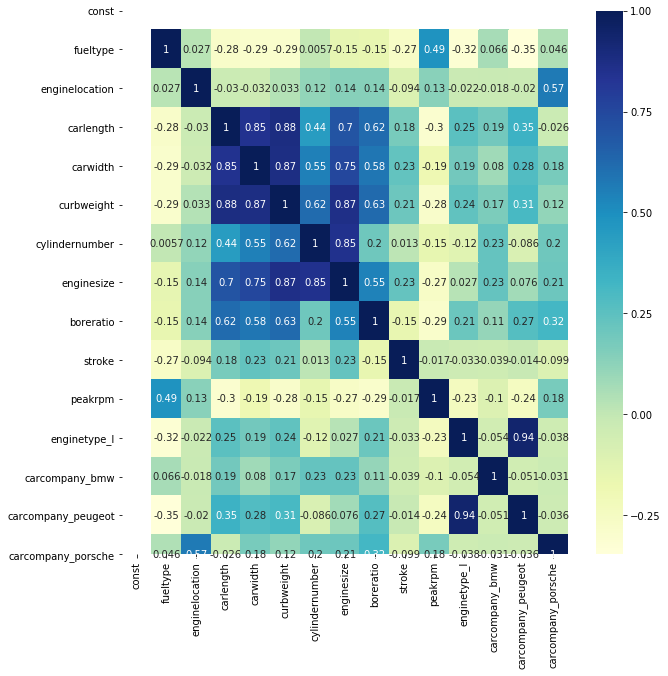

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_2.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Model 3: `carlength` has high correlation with other variables and its p-value is high (0.035) with smaller `coef` so can be dropped

In [37]:
X_train_3 = X_train_2.drop(['carlength'],axis=1)
X_train_3 = sm.add_constant(X_train_3)
lm_3 = sm.OLS(y_train,X_train_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     141.0
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.60e-69
Time:                        23:22:59   Log-Likelihood:                -1289.5
No. Observations:                 143   AIC:                             2607.
Df Residuals:                     129   BIC:                             2648.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.054e+04   2354

### There is almost no impact on `Adj. R-squared` value and `F-Statistic` has increased a little bit so we are moving in right direction

In [38]:
print(VIF_calculation(X_train_3))

              Features     VIF
0                const  179.68
6           enginesize   36.89
5       cylindernumber   17.78
4           curbweight   10.83
12  carcompany_peugeot    9.87
10        enginetype_l    9.12
7            boreratio    6.92
3             carwidth    5.50
8               stroke    3.48
13  carcompany_porsche    2.13
2       enginelocation    1.81
1             fueltype    1.75
9              peakrpm    1.74
11      carcompany_bmw    1.11


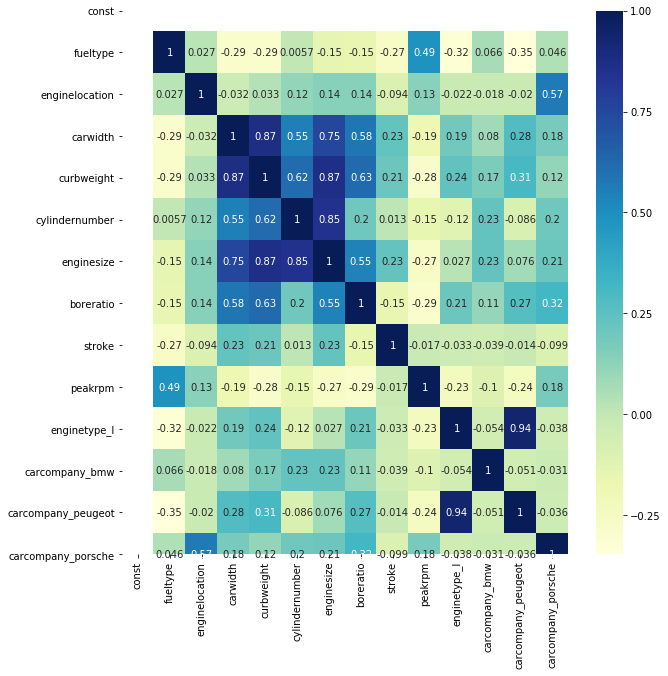

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_3.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Model 4: `enginetype_l` variable has very high correlation `0.94` with `peugeot` car company so can be dropped

In [40]:
X_train_4 = X_train_3.drop(['enginetype_l'],axis=1)
X_train_4 = sm.add_constant(X_train_4)
lm_4 = sm.OLS(y_train,X_train_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     145.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.69e-69
Time:                        23:23:01   Log-Likelihood:                -1293.2
No. Observations:                 143   AIC:                             2612.
Df Residuals:                     130   BIC:                             2651.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.165e+04   2368

In [41]:
print(VIF_calculation(X_train_4))

              Features     VIF
0                const  173.91
6           enginesize   36.34
5       cylindernumber   17.54
4           curbweight   10.83
7            boreratio    6.82
3             carwidth    5.43
8               stroke    3.44
12  carcompany_porsche    2.11
2       enginelocation    1.80
1             fueltype    1.75
9              peakrpm    1.74
11  carcompany_peugeot    1.44
10      carcompany_bmw    1.11


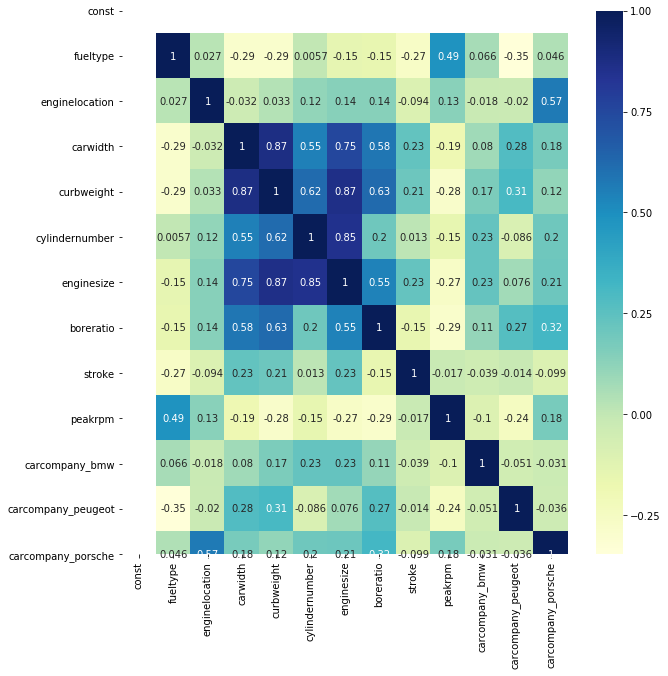

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_4.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Model 5: `curbweight` has high correlation in with other variables like `carwidth`, `enginesize` etc.. so can be dropped

In [43]:
X_train_5 = X_train_4.drop(['curbweight'],axis=1)
X_train_5 = sm.add_constant(X_train_5)
lr_5 = sm.OLS(y_train,X_train_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     141.0
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.78e-67
Time:                        23:23:03   Log-Likelihood:                -1301.6
No. Observations:                 143   AIC:                             2627.
Df Residuals:                     131   BIC:                             2663.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.434e+04   2398

In [44]:
print(VIF_calculation(X_train_5))

              Features     VIF
0                const  159.95
5           enginesize   24.58
4       cylindernumber   15.35
6            boreratio    6.64
3             carwidth    3.57
7               stroke    3.17
11  carcompany_porsche    2.08
2       enginelocation    1.79
8              peakrpm    1.73
1             fueltype    1.72
10  carcompany_peugeot    1.35
9       carcompany_bmw    1.10


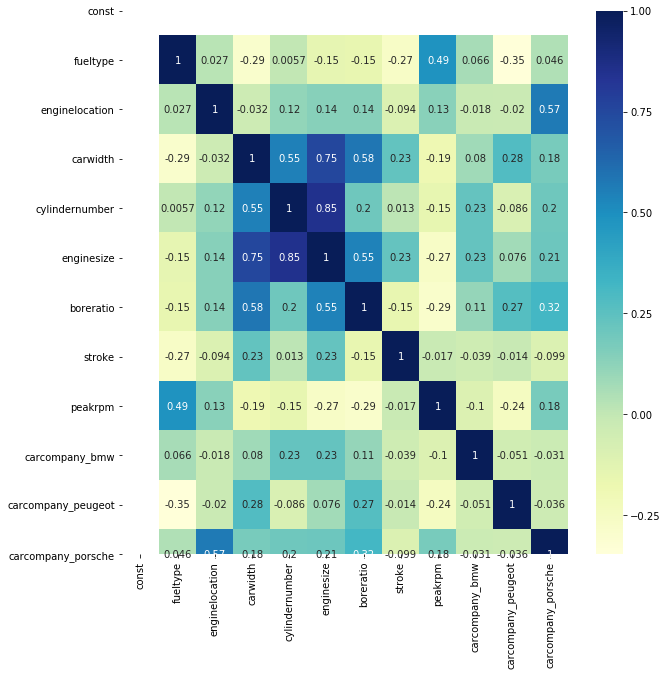

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_5.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Model 6: `enginesize` has very high correlation with other variables so can be dropped

In [46]:
X_train_6 = X_train_5.drop(['enginesize'],axis=1)
X_train_6 = sm.add_constant(X_train_6)
lr_6 = sm.OLS(y_train,X_train_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     80.12
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.37e-51
Time:                        23:23:04   Log-Likelihood:                -1344.2
No. Observations:                 143   AIC:                             2710.
Df Residuals:                     132   BIC:                             2743.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5894.9850   1863

In [47]:
print(VIF_calculation(X_train_6))

              Features    VIF
0                const  53.52
3             carwidth   3.46
5            boreratio   2.38
4       cylindernumber   2.10
10  carcompany_porsche   1.80
7              peakrpm   1.72
1             fueltype   1.71
2       enginelocation   1.59
6               stroke   1.37
9   carcompany_peugeot   1.34
8       carcompany_bmw   1.10


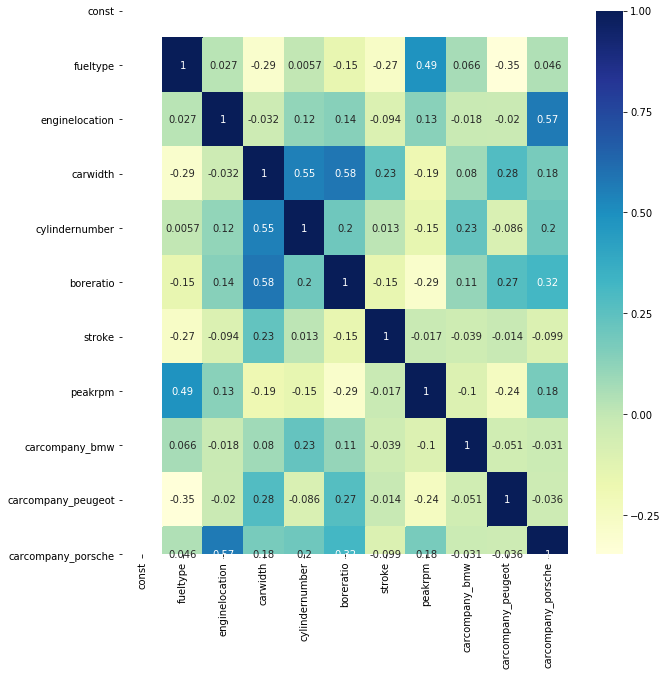

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_6.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Model 7: `carcompany_porsche` variable has p-value very high so can be dropped

In [49]:
X_train_7 = X_train_6.drop(['carcompany_porsche'],axis=1)
X_train_7 = sm.add_constant(X_train_7)
lr_7 = sm.OLS(y_train,X_train_7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     89.61
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.74e-52
Time:                        23:23:06   Log-Likelihood:                -1344.3
No. Observations:                 143   AIC:                             2709.
Df Residuals:                     133   BIC:                             2738.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5772.0428   1820

In [50]:
print(VIF_calculation(X_train_7))

             Features    VIF
0               const  51.46
3            carwidth   3.46
5           boreratio   2.22
4      cylindernumber   2.07
1            fueltype   1.70
7             peakrpm   1.63
6              stroke   1.36
9  carcompany_peugeot   1.33
2      enginelocation   1.17
8      carcompany_bmw   1.09


### Model 8: `stroke` has high p-value (0.2) so can be dropped

In [51]:
X_train_8 = X_train_7.drop(['stroke'],axis=1)
X_train_8 = sm.add_constant(X_train_8)
lr_8 = sm.OLS(y_train,X_train_8).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     100.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.03e-52
Time:                        23:23:06   Log-Likelihood:                -1345.2
No. Observations:                 143   AIC:                             2708.
Df Residuals:                     134   BIC:                             2735.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4174.6068   1335

In [52]:
print(VIF_calculation(X_train_8))

             Features    VIF
0               const  27.55
3            carwidth   2.92
4      cylindernumber   1.97
5           boreratio   1.92
1            fueltype   1.65
6             peakrpm   1.63
8  carcompany_peugeot   1.30
2      enginelocation   1.17
7      carcompany_bmw   1.09


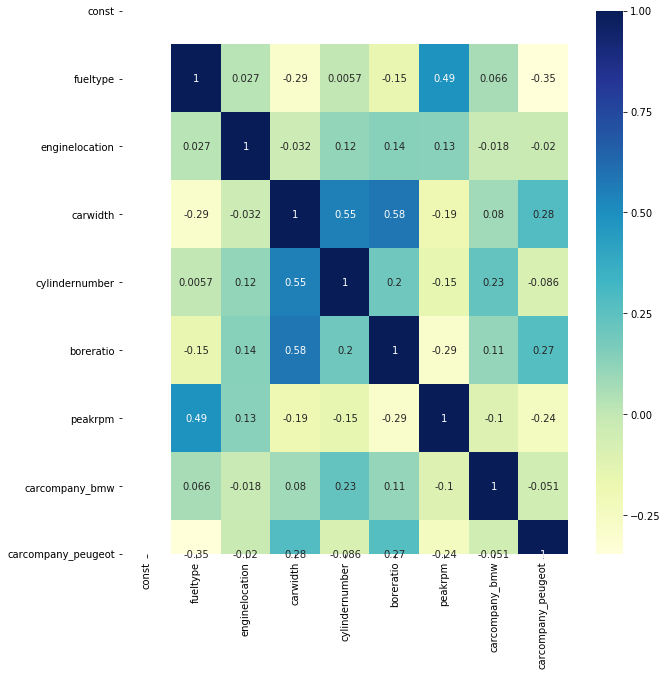

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_8.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Model 9: `boreratio` has high correlation (0.58) with `carwidth` so can be dropped

In [54]:
X_train_9 = X_train_8.drop(['boreratio'],axis=1)
X_train_9 = sm.add_constant(X_train_9)
lm_9 = sm.OLS(y_train,X_train_9).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.64e-52
Time:                        23:23:07   Log-Likelihood:                -1349.1
No. Observations:                 143   AIC:                             2714.
Df Residuals:                     135   BIC:                             2738.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3141.8431   1312

In [55]:
print(VIF_calculation(X_train_9))

             Features    VIF
0               const  25.36
3            carwidth   1.87
4      cylindernumber   1.80
1            fueltype   1.55
5             peakrpm   1.44
7  carcompany_peugeot   1.30
6      carcompany_bmw   1.08
2      enginelocation   1.06


### Model 10: `peakrpm` is insignificant as it has p-value >0.05 so can be dropped

In [56]:
X_train_10 = X_train_9.drop(['peakrpm'],axis=1)
X_train_10 = sm.add_constant(X_train_10)
lm_10 = sm.OLS(y_train,X_train_10).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     125.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.31e-53
Time:                        23:23:07   Log-Likelihood:                -1349.9
No. Observations:                 143   AIC:                             2714.
Df Residuals:                     136   BIC:                             2734.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2874.3198   1294

In [57]:
print(VIF_calculation(X_train_10))

             Features    VIF
0               const  24.63
3            carwidth   1.85
4      cylindernumber   1.73
6  carcompany_peugeot   1.27
1            fueltype   1.22
5      carcompany_bmw   1.06
2      enginelocation   1.03


### Model 11: `fueltype` variable is insignificant as it has p-value >0.05 so can be dropped

In [58]:
X_train_11 = X_train_10.drop(['fueltype'],axis=1)
X_train_11 = sm.add_constant(X_train_11)
lm_11 = sm.OLS(y_train,X_train_11).fit()
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     149.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.27e-53
Time:                        23:23:07   Log-Likelihood:                -1350.9
No. Observations:                 143   AIC:                             2714.
Df Residuals:                     137   BIC:                             2731.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4345.4722    745

In [59]:
print(VIF_calculation(X_train_11))

             Features   VIF
0               const  8.10
2            carwidth  1.73
3      cylindernumber  1.70
5  carcompany_peugeot  1.20
4      carcompany_bmw  1.06
1      enginelocation  1.03


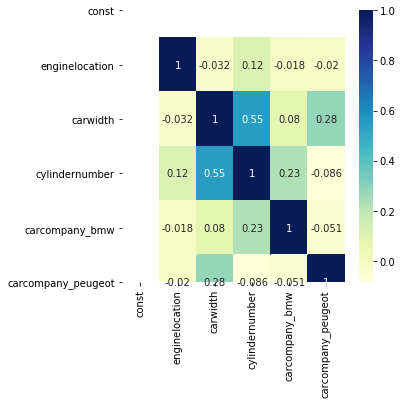

In [60]:
plt.figure(figsize=(5,5))
sns.heatmap(X_train_11.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Model 12: `carcompany_peugeot` has high p-value 0.035 and small `coef` value as compared to other variables dropping it to check effect on model

In [61]:
X_train_12 = X_train_11.drop(['carcompany_peugeot'],axis=1)
X_train_12 = sm.add_constant(X_train_12)
lm_12 = sm.OLS(y_train,X_train_12).fit()
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     180.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           7.95e-54
Time:                        23:23:08   Log-Likelihood:                -1353.2
No. Observations:                 143   AIC:                             2716.
Df Residuals:                     138   BIC:                             2731.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4210.3336    751.767     -5.

In [62]:
print(VIF_calculation(X_train_12))

         Features   VIF
0           const  8.04
3  cylindernumber  1.56
2        carwidth  1.46
4  carcompany_bmw  1.06
1  enginelocation  1.03


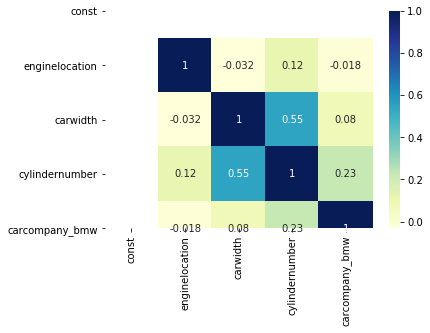

In [63]:
sns.heatmap(X_train_12.corr(),annot=True,cmap="YlGnBu")
plt.show()

#### Note that `F-Statistics` has improved form 149 to 180. 
<font color='green'> 
Now this set of variables look optimal as `VIF` and `p-value` are in acceptable range for all the variables. Also We have below stats:   
**`Adj R-Squared`:**      0.835    <br>
**`F-statistic`:**        180.8    <br>
**`Prob (F-statistic)`:** 7.95e-54 <br>

#### Other observations:        
**`Kurtosis`** > 3. <font color='black'> It shows that data distribution is more peaked and has fatter tails than normal distribution </font><br>
**`Durbin-Watson`:**  2.133.  <font color='black'>It is a test for autocorrelation in the residuals from a statistical regression analysis. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative. Value close to 2 is better.   </font></font>

## Step 6: Predicted value and Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

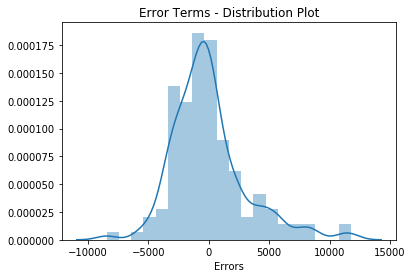

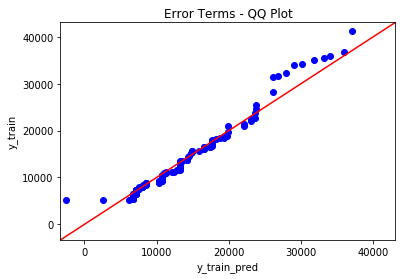

In [64]:
y_train_pred = lm_12.predict(X_train_12)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred),bins=20)
plt.title('Error Terms - Distribution Plot')                   
plt.xlabel('Errors')                      
plt.show()

pp_x = sm.ProbPlot(y_train)
pp_y = sm.ProbPlot(y_train_pred)
sm.qqplot_2samples(pp_x, pp_y,line='45')
plt.title('Error Terms - QQ Plot')                   
plt.xlabel('y_train_pred')                      
plt.ylabel('y_train')
plt.show()

#### <font color='green'> `Errorterms` are normally distributed with mean value = 0 but it has heavy tail at the right hand side. <br><br> Same observations are there from `QQ plot` of `y_train` and `y_train_pred` as we can see values above 45-degree line towards the right side of the plot <br><br> This is due to outlier values in car price which can't be predicted by model without error so errorterm distribution has heavy/fat right tail </font>

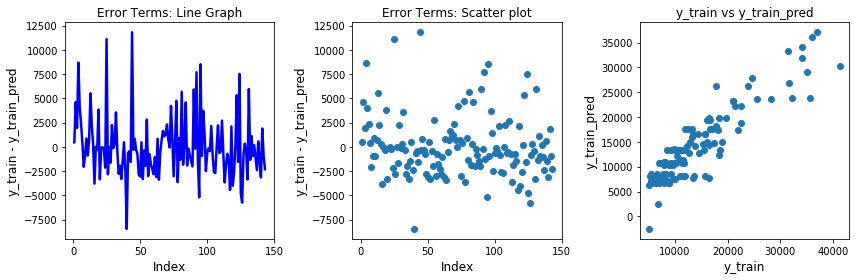

In [65]:
# Error terms
c = [i for i in range(1,144,1)]
fig = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(c,y_train-y_train_pred, color="blue", linewidth=2.5, linestyle="-")
plt.xlabel('Index', fontsize=12)                      
plt.ylabel('y_train - y_train_pred', fontsize=12) 
plt.title('Error Terms: Line Graph')

plt.subplot(132)
plt.scatter(c,y_train - y_train_pred)
plt.xlabel('Index', fontsize=12)                     
plt.ylabel('y_train - y_train_pred', fontsize=12) 
plt.title('Error Terms: Scatter plot')

plt.subplot(133)
plt.scatter(y_train,y_train_pred)
plt.xlabel('y_train', fontsize=12)                         
plt.ylabel('y_train_pred', fontsize=12)                        
plt.title('y_train vs y_train_pred')

plt.tight_layout()
plt.show()

#### <font color='green'> `Errorterms` are `independent` of each other as there is no specific pattern. <br><br> also `Errorterms` have constant variance (`homoscedasticity`) </font>

## Check r2 using `Cross Validation` method

In [66]:
from sklearn.model_selection import cross_val_score, cross_val_predict
#from sklearn import metrics
from sklearn import datasets, linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X_train_12,y_train)
scores = cross_val_score(model, X_train_12, y_train, scoring='r2')
print ('Cross-validated scores:', scores)
print('Cross-validated mean score:', scores.mean())

Cross-validated scores: [0.63632752 0.8690336  0.8129868 ]
Cross-validated mean score: 0.7727826389708646


### <font color='green'> Mean of `r2` using cross validation technique on 3 different subsets (randomly auto-selected) from train data is `0.772` as compared to adjusted r2-value of lm_12 of `0.835` </font>

## Step 7: Making Predictions Using the Final Model 

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model i.e. `lm_12`

In [67]:
col_12 = ['enginelocation', 'carwidth','cylindernumber', 'carcompany_bmw','price']
num_vars_12 = ['carwidth','cylindernumber']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [68]:
df_test_12 = df_test[col_12]
y_test = df_test_12.pop('price')
X_test = df_test_12

In [69]:
X_test.head()
y_test.head()
X_test.describe()

,enginelocation,carwidth,cylindernumber,carcompany_bmw
count,62.000000,62.000000,62.000000,62.000000
mean,0.032258,0.480376,0.232258,0.032258
std,0.178127,0.165440,0.088288,0.178127
min,0.000000,0.183333,0.200000,0.000000
25%,0.000000,0.358333,0.200000,0.000000
50%,0.000000,0.441667,0.200000,0.000000
75%,0.000000,0.516667,0.200000,0.000000
max,1.000000,0.975000,0.600000,1.000000


In [70]:
# Making predictions
X_test = sm.add_constant(X_test)
y_pred = lm_12.predict(X_test)
y_pred


160     8506.189533
186    11020.959765
59     13307.114521
165     7591.727630
140     7134.496679
           ...     
28      8963.420484
29     12849.883570
182    11020.959765
40      4162.495495
128    34028.000000
Length: 62, dtype: float64

## Step 8: Model Evaluation
Let's now plot the graph for actual versus predicted values.

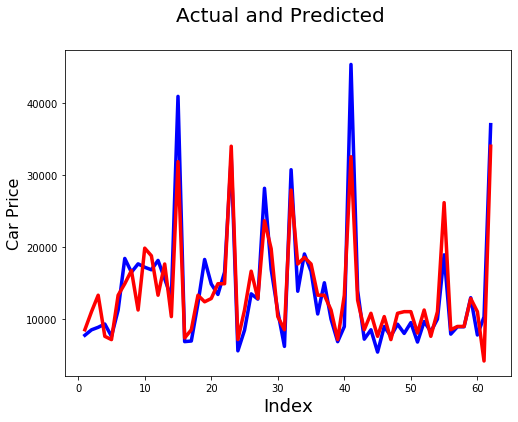

In [71]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(8,6))
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")  #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
#mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
#print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r2_score)

r_square_value : 0.8424019776895109


# Conclusion

<font color='blue'> 1. Based on Model 12, we can see that the equation of our best fitted line is:</font>

<font color='green'> $ price = -4210.33 + 20810  \times enginelocation   + 27430  \times  carwidth + 16720 \times cylindernumber + 10370 \times bmw $
</font>

<font color='blue'> 2. `r2-score` of test data and predicted data is `0.842` which is similar to `adjusted r2-value` of lm_12 of `0.835` </font>

<font color='blue'> 3. `enginelocation` variable plays a critical role in driving car price as with `rear` enginelocation car price can go up by ~20,800 USD  </font>

<font color='blue'> 4. `carwidth` variable plays a critical role in driving car price. <br> - It effectively means that size of car as `wheelbase`,`carlength`,`carwidth`, `curbweight` have very high correlation <br> - `carwidth` has been scaled (0,1) right now so max value can be 1 </font>

<font color='blue'> 5. `cylindernumber` variable plays a critical role in deciding car price as higher the # of cylinders higher the car price <br> - `cylindernumber` has been scaled (0,1) right now so max value can be 1 </font>

<font color='blue'> 6. `bmw` car company has wide range of price in cars starting from 20k to 40k USD so `Geely Auto` company can follow same car model strategy to cover market and wide car price range <br> - It requires separate research about `bmw` car models and strategy to use this variable effectively </font>